<a href="https://colab.research.google.com/github/assaabriiii/AI/blob/main/ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

In [14]:
data = pd.read_csv('frcities.csv')

In [15]:
print(data.shape)

(59064, 7)


In [16]:
print('number of NaN(null) in each column:')
print(data.isnull().sum())

number of NaN(null) in each column:
city              0
lat               0
lng               0
iso2              0
density           1
population    22973
ranking           0
dtype: int64


In [17]:
print('number of duplicated cities or data:')
print(data.duplicated().sum())

number of duplicated cities or data:
0


In [18]:
clean_data = data.dropna(subset=['population']).drop_duplicates(subset='city', keep='first')
print(clean_data.shape)

(33481, 7)


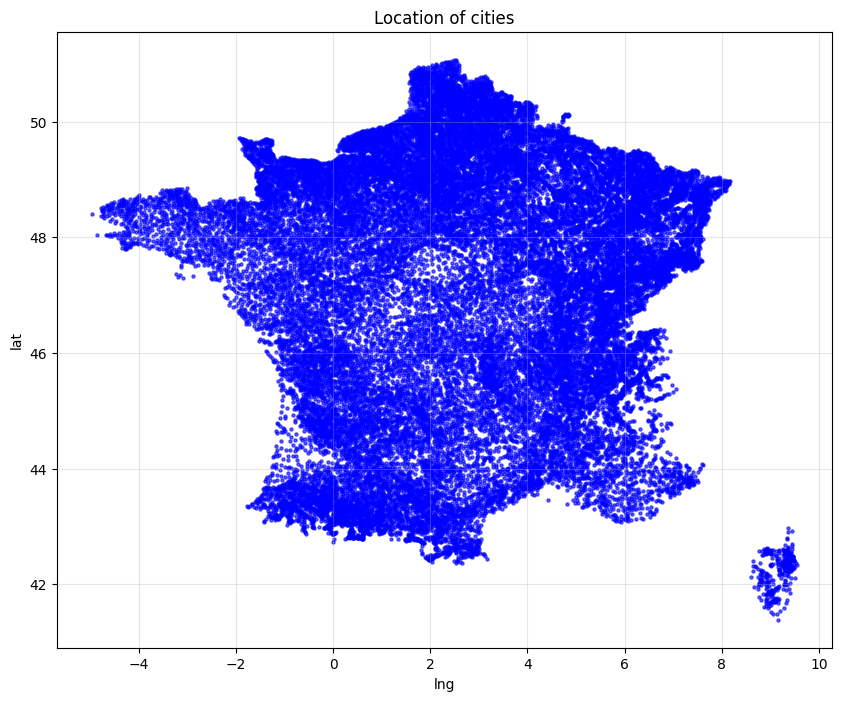

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(clean_data['lng'], clean_data['lat'], c='blue', s=5, alpha=0.6)
plt.title('Location of cities')
plt.xlabel('lng')
plt.ylabel('lat')
plt.grid(True, alpha=0.3)
plt.show()

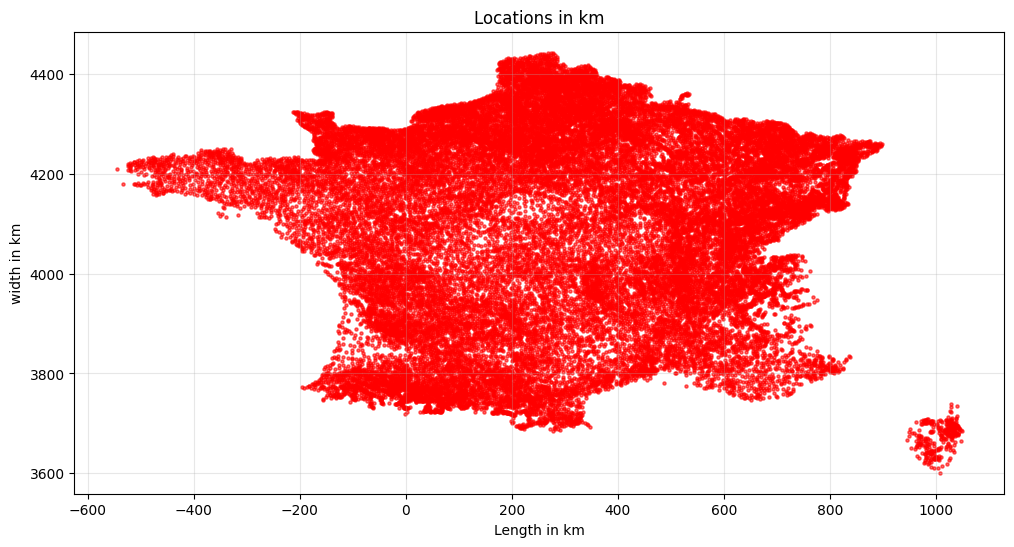

In [20]:
clean_data['lat_km'] = clean_data['lat'].apply(lambda x: x * 87)
clean_data['lng_km'] = clean_data['lng'].apply(lambda x: x * 110)

plt.figure(figsize=(12, 6))
plt.scatter(clean_data['lng_km'], clean_data['lat_km'], c='red', s=5, alpha=0.6)
plt.title('Locations in km')
plt.xlabel('Length in km')
plt.ylabel('width in km')
plt.grid(True, alpha=0.3)
plt.show()

In [26]:
clean_data['area'] = clean_data['population'] / clean_data['density']
clean_data['area'] = clean_data['area'].where(clean_data['density'] > 0)

print(clean_data[['city', 'population', 'density', 'area']])

                         city  population  density       area
1                    Louresse       872.0      NaN        NaN
2                       Olmet       161.0     10.4  15.480769
4                 Gottenhouse       382.0    305.6   1.250000
5                     Bergues      3637.0   2755.3   1.320001
7      Saint-Martin-d’Arrossa       538.0     29.2  18.424658
...                       ...         ...      ...        ...
59052   Saint-Jean-Bonnefonds      6627.0    571.8  11.589717
59055              Neuvecelle      3076.0    769.0   4.000000
59056     Cognocoli-Monticchi       171.0      4.8  35.625000
59061           Saint-Eutrope       168.0     62.9   2.670906
59063                 Taillis       996.0     81.2  12.266010

[33481 rows x 4 columns]


In [22]:
sum_digits = 26  # 40405184


if sum_digits <= 23:
    center_lat, center_lng = 43, 2
elif 24 <= sum_digits <= 27:
    center_lat, center_lng = 45, 3
elif 28 <= sum_digits <= 30:
    center_lat, center_lng = 47, 0
else:
    center_lat, center_lng = 49, 2.5

print(f"Center point: ({center_lat}, {center_lng})")

Center point: (45, 3)


In [27]:
import numpy as np

center_lat_km = center_lat * 87
center_lng_km = center_lng * 110

distances = np.sqrt(
    (clean_data['lat_km'] - center_lat_km)**2 +
    (clean_data['lng_km'] - center_lng_km)**2
)

nearby_cities = clean_data[distances <= 100].copy()
nearby_cities['distance_km'] = distances[distances <= 100]

nearby_cities = nearby_cities.sort_values('distance_km')

print(f"number of cities in range of 100km: {len(nearby_cities)}")
print(nearby_cities[['city', 'lat', 'lng', 'population', 'distance_km']].head(10))

number of cities in range of 100km: 1174
             city      lat     lng  population  distance_km
58389  Les Ternes  44.9983  3.0136       579.0     1.503293
22590   Tanavelle  45.0228  2.9983       229.0     1.992395
46093     Sériers  44.9764  3.0394       131.0     4.795747
27857     Roffiac  45.0525  3.0381       618.0     6.198914
33337  Neuvéglise  44.9281  2.9833      1123.0     6.519459
34428   Lavastrie  44.9353  3.0422       247.0     7.296073
48363      Cussac  44.9836  2.9325       124.0     7.560845
39104    Coltines  45.0933  2.9878       447.0     8.227289
18098     Andelat  45.0606  3.0614       469.0     8.568116
35119   Valuéjols  45.0531  2.9339       564.0     8.614469


In [24]:
from scipy.stats import pearsonr, spearmanr, kendalltau
import numpy as np

valid_data = clean_data.dropna(subset=['population', 'area', 'density', 'lat'])

print(f"تعداد نمونه‌های معتبر برای همبستگی: {len(valid_data)}")

# تابع کمکی برای محاسبه و چاپ همبستگی
def print_corr(name, corr_func, x, y):
    corr, p_val = corr_func(x, y)
    print(f"{name}:")
    print(f"   ضریب همبستگی = {corr:.4f}")
    print(f"   p-value = {p_val:.2e}")
    print()

print("=== همبستگی population و area ===")
print_corr("Pearson", pearsonr, valid_data['population'], valid_data['area'])
print_corr("Spearman", spearmanr, valid_data['population'], valid_data['area'])
print_corr("Kendall Tau", kendalltau, valid_data['population'], valid_data['area'])

print("=== همبستگی density و lat ===")
print_corr("Pearson", pearsonr, valid_data['density'], valid_data['lat'])
print_corr("Spearman", spearmanr, valid_data['density'], valid_data['lat'])
print_corr("Kendall Tau", kendalltau, valid_data['density'], valid_data['lat'])

تعداد نمونه‌های معتبر برای همبستگی: 33478
=== همبستگی population و area ===
Pearson:
   ضریب همبستگی = 0.7258
   p-value = 0.00e+00

Spearman:
   ضریب همبستگی = 0.3454
   p-value = 0.00e+00

Kendall Tau:
   ضریب همبستگی = 0.2373
   p-value = 0.00e+00

=== همبستگی density و lat ===
Pearson:
   ضریب همبستگی = 0.0725
   p-value = 2.83e-40

Spearman:
   ضریب همبستگی = 0.1935
   p-value = 7.39e-280

Kendall Tau:
   ضریب همبستگی = 0.1308
   p-value = 3.71e-282

